# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector

from sklearn import set_config

set_config(display="diagram") #setting this will display your pipelines as seen above

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [2]:
# To understand our project objectives/requirements from a business perspective,
# we need to first take a look at the dataset.
filename = 'data/vehicles.csv'
df = pd.read_csv(filename)
df.head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [3]:
# According to the overview, our mission is to find and understand factors 
# that would make a car more or less expensive.
# This means that all columns can be potential factors contributing to our targeted column 'price'.
# We need to find which columns would make the column 'price' increase and which would make it decrease.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [4]:
df.head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [5]:
# The most noticeable part of this dataset is the numerous missing values.
# Let's analyze the number of missing values in each column
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [6]:
# Now let's compare it to the df's total amount of cars.
df.shape

(426880, 18)

In [7]:
# You can see that some columns have a significant amount of missing values
# that if we decide to get rid of all missing values, we would lose a significant amount of data.

In [8]:
# By how this dataset was structured, I believe that each row represents an individual car.

# Now let's identify what each column may represent by looking at its elements:

In [9]:
    # id - the label of the car
    df.id.unique()

array([7222695916, 7218891961, 7221797935, ..., 7301591147, 7301591140,
       7301591129], dtype=int64)

In [10]:
    # region - the region where the car was manufactured
    df.region.unique()

array(['prescott', 'fayetteville', 'florida keys',
       'worcester / central MA', 'greensboro', 'hudson valley',
       'medford-ashland', 'erie', 'el paso', 'bellingham',
       'skagit / island / SJI', 'la crosse', 'auburn', 'birmingham',
       'dothan', 'florence / muscle shoals', 'gadsden-anniston',
       'huntsville / decatur', 'mobile', 'montgomery', 'tuscaloosa',
       'anchorage / mat-su', 'fairbanks', 'kenai peninsula',
       'southeast alaska', 'flagstaff / sedona', 'mohave county',
       'phoenix', 'show low', 'sierra vista', 'tucson', 'yuma',
       'fort smith', 'jonesboro', 'little rock', 'texarkana',
       'bakersfield', 'chico', 'fresno / madera', 'gold country',
       'hanford-corcoran', 'humboldt county', 'imperial county',
       'inland empire', 'los angeles', 'mendocino county', 'merced',
       'modesto', 'monterey bay', 'orange county', 'palm springs',
       'redding', 'reno / tahoe', 'sacramento', 'san diego',
       'san luis obispo', 'santa barbara',

In [11]:
    # price - how much the car cost
    df.price.unique()

array([ 6000, 11900, 21000, ...,  6328, 19853, 17873], dtype=int64)

In [12]:
    # year - when the car was manufactured
    df.year.unique()

array([  nan, 2014., 2010., 2020., 2017., 2013., 2012., 2016., 2019.,
       2011., 1992., 2018., 2004., 2015., 2001., 2006., 1968., 2003.,
       2008., 2007., 2005., 1966., 2009., 1998., 2002., 1999., 2021.,
       1997., 1976., 1969., 1995., 1978., 1954., 1979., 1970., 1974.,
       1996., 1987., 2000., 1955., 1960., 1991., 1972., 1988., 1994.,
       1929., 1984., 1986., 1989., 1973., 1946., 1933., 1958., 1937.,
       1985., 1957., 1953., 1942., 1963., 1977., 1993., 1903., 1990.,
       1965., 1982., 1948., 1983., 1936., 1932., 1951., 1931., 1980.,
       1967., 1971., 1947., 1981., 1926., 1962., 1975., 1964., 1934.,
       1952., 1940., 1959., 1950., 1930., 1956., 1922., 1928., 2022.,
       1901., 1941., 1924., 1927., 1939., 1923., 1949., 1961., 1935.,
       1918., 1900., 1938., 1913., 1916., 1943., 1925., 1921., 1915.,
       1945., 1902., 1905., 1920., 1944., 1910., 1909.])

In [13]:
    # manufacturer - what car company manufactured the car
    df.manufacturer.unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [14]:
    # model - the version of the car
    df.model.unique()

array([nan, 'sierra 1500 crew cab slt', 'silverado 1500', ...,
       'gand wagoneer', '96 Suburban', 'Paige Glenbrook Touring'],
      dtype=object)

In [15]:
    # condition - the current state of the car
    df.condition.unique()

array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [16]:
    # cylinders - the amount of cylinders that the car's engine has
    df.cylinders.unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [17]:
    # fuel - the type of fuel the car relys on to run
    df.fuel.unique()

array([nan, 'gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [18]:
    # odometer - the total distance that the car has run so far
    df.odometer.unique()

array([    nan,  57923.,  71229., ..., 172511.,  94964.,  26892.])

In [19]:
    # title_status - the legal ownership status of the car
        # clean      - the car has no outstanding liens or legal issues
        # salvage    - the car has been damaged to the extent 
        #                that the cost of repairing it is close or exceeds its current value
        # rebuilt    - the car was previously declared salvage but has now been repaired to its roadworthy condition
        # lien       - financial institution or individual having legal claim to the car
        #                due to its outstanding loan/debt
        # missing    - the legal documentation proving ownership of the car is not available or has been lost
        # parts only - the car is beyond repair and 
        #                is intended to be dismantled rather than to be put back on the raod
    df.title_status.unique()

array([nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing',
       'parts only'], dtype=object)

In [20]:
    # transmission - the type of mechanical system responsible for the car's transmission
    df.transmission.unique()

array([nan, 'other', 'automatic', 'manual'], dtype=object)

In [21]:
    # VIN - stands for Vehicle Identification Number
    #         serves as a fingerprint for the vehicle
    #         providing a way to identify and track individual cars throughout their lifespan
    df.VIN.unique()

array([nan, '3GTP1VEC4EG551563', '1GCSCSE06AZ123805', ...,
       '2HGES15535H620534', '1FDWF37P64EA24868', 'SAJGX2749VCOO8376'],
      dtype=object)

In [22]:
    # drive - different types of drivetrains in cars
    #           they indicate which car's wheels that the engine's power is distributing to
        # rwd - rear-wheel drive
        # 4wd - four-wheel drive
        # fwd - front-wheel drive
    df.drive.unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [23]:
    # size - the size of the car
        # full-size   - car with ample interior space for passengers and cargo
        # mid-size    - smaller than full-size but larger than compact 
        #                 striking a balance between interior space and fuel efficiency
        # compact     - smaller than mid-size
        #                 known for their efficient fuel consumption and easy maneuverability
        # sub-compact - the smallest out of all four
        #                 its small size makes it great for urban commuting
        #                 as well as parking and navigating in tight spaces
    df['size'].unique()

array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

In [24]:
    # type - the type of car it is
    df.type.unique()

array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

In [25]:
    # paint_color - the color painted on the car
    df.paint_color.unique()

array([nan, 'white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [26]:
    # state - the state in which the car was manufactured
    df.state.unique()

array(['az', 'ar', 'fl', 'ma', 'nc', 'ny', 'or', 'pa', 'tx', 'wa', 'wi',
       'al', 'ak', 'ca', 'co', 'ct', 'dc', 'de', 'ga', 'hi', 'id', 'il',
       'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'mi', 'mn', 'ms', 'mo',
       'mt', 'ne', 'nv', 'nj', 'nm', 'nh', 'nd', 'oh', 'ok', 'ri', 'sc',
       'sd', 'tn', 'ut', 'vt', 'va', 'wv', 'wy'], dtype=object)

In [27]:
# Thus, to sum up, I believe the dataset represents each car by:
    # its label (id, VIN)
    # its manufacturing (year, region, state, manufacturer)
    # its car types and looks (model, type, size, paint_color)
    # its current status/history (condition, title_status, odometer)
    # its car parts and other backgrounds (cylinders, fuel, transmission, drive)
    # and of course, how much it's cost (price)

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [28]:
# Our targeted column is the 'price'.
# When you think about it realistically/logically, the car's unique identity labels shouldn't impact its value.
# Thus, we should drop the columns 'id' and 'VIN'
df_drop = df.drop(columns=['id','VIN'])
df_drop.head(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [29]:
# As mentioned before, the dataset's biggest issue is its numerous missing values.
# Getting rid of all missing values is not a good idea as that will sacrifice most of the data.
# Thus, as Savio mentioned in his last office hour, we should rely on imputers.

# Presuming that they may be strong relationships between the missing values and other features,
# I am going to use the K-Nearest Neighbor Imputer.
from sklearn.impute import KNNImputer

In [30]:
imputer = KNNImputer()
# the fit_transform will produce an error because df_clean contains categorical columns
# imputed_df = imputer.fit_transform(df_drop)
# imputed_df.head(5)

In [31]:
# If you don't have fancyimpute installed, then you'll need to install it in your Anaconda prompt with the below code:
# conda install -c conda-forge fancyimpute

In [32]:
# It turns out that KNNImputer doesn't work for non-numeric columns.
# However, there may exist another KNNImputer adapted for categorical data.
# Perhaps KNN from fancyimpute would be one?
from fancyimpute import KNN

# this fit_transform also produce an error for the similar reason
# imputed_df = KNN().fit_transform(df_drop)
# imputed_df.head(5)

(CVXPY) Aug 29 12:05:11 AM: Encountered unexpected exception importing solver OSQP:
ImportError('DLL load failed while importing qdldl: The specified module could not be found.')


In [33]:
# Nope, there's none after all.
# Let's try IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [34]:
imputer = IterativeImputer(random_state=0)
# Doesn't work either for the same reason
# imputer.fit(df_drop)
# imputed_df = imputer.transform(df_drop)
# imputed_df.head(5)

In [35]:
# Since median and mean wouldn't work for non-numeric columns,
# I might as well use a SimpleImputer using the strategy Mode
from sklearn.impute import SimpleImputer

In [36]:
# I've finally found a solution. Filling all missing values with frequent values using SimpleImputer.
# However, this relies on the feature itself rather than relying on the relaionship of other features
# in which I personally see as less accurate.
imputer = SimpleImputer(strategy='most_frequent')
imputed_data = imputer.fit_transform(df_drop)
imputed_df = pd.DataFrame(imputed_data, columns=df_drop.columns)
imputed_df.head(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,6000,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,az
1,fayetteville,11900,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,ar
2,florida keys,21000,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,fl
3,worcester / central MA,1500,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,ma
4,greensboro,4900,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,nc


In [37]:
# If you don't have impyute installed, then do so with the following code below:
# pip install impyute

In [38]:
# Let's try this instead.
# Converting all categorical columns to numerical representations
# and then using fast_knn from impyute.imputation.cs.
from impyute.imputation.cs import fast_knn

In [39]:
# Converting...
#df_to_numeric = pd.get_dummies(df_drop, dummy_na=True)
#df_to_numeric.head(5)

# This doesn't work because DataFrame object doesn't have attribute as_matrix
# in which I don't know what it means.

# Performing KNN-based imputation...
#imputed_numeric_df = fast_knn(df_to_numeric, k=df_drop.shape[1])

# Converting back to categorical
#imputed_categorical_df = pd.DataFrame(imputed_numeric_df, columns=df_to_numeric.columns).idxmax(axis=1)
#imputed_categorical_df.head(5)

In [40]:
# Thus, we shall be sticking with SimpleImputer with strategy 'most_frequent'
imputed_df.head(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,6000,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,az
1,fayetteville,11900,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,ar
2,florida keys,21000,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,fl
3,worcester / central MA,1500,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,ma
4,greensboro,4900,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,nc


In [41]:
# As you can see, there aren't any null values left. 
# All of them are replaced by frequent values in each column which may make the DataFrame more bias or inaccurate 
# but I personally believe it's better than getting rid of most of the data.
imputed_df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [42]:
# It wouldn't make sense for price to be 0.
imputed_df.price.eq(0).sum()

32895

In [43]:
# Since there exists some prices that are 0, let's replace them all with a median of all nonzero prices.
median = imputed_df.query('price > 0')['price'].median()
imputed_df['price'] = imputed_df['price'].replace(0, median)
imputed_df.price.eq(0).sum()

0

In [44]:
# The models that I'll use may impact how I will categorically encode the dataset so
# I won't do any encoding in the Data Preparation but in the Modeling instead.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [45]:
# As a reminder, this will be the final dataset that we will create some models for:
imputed_df.head(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,6000.0,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,az
1,fayetteville,11900.0,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,ar
2,florida keys,21000.0,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,fl
3,worcester / central MA,1500.0,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,ma
4,greensboro,4900.0,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,nc


In [46]:
# Splitting the features (X) from the targeted column 'price' (y)
X = imputed_df.drop(columns="price")
y = imputed_df["price"]

In [47]:
X.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,az
1,fayetteville,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,ar
2,florida keys,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,fl
3,worcester / central MA,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,ma
4,greensboro,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,nc


In [48]:
y.head()

0     6000.0
1    11900.0
2    21000.0
3     1500.0
4     4900.0
Name: price, dtype: float64

#### CatBoost Model (Gradient Boosting with Categorical Handling)

In [49]:
# 0.7:0.3 train_test_split with random_state=1
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [50]:
# If you haven't installed catboost, then do so below:
# pip install catboost
# If you don't have the category_encoders, then you'll have to install it in the Anaconda prompt:
# conda install -c conda-forge category_encoders

In [51]:
# I will first try the CatBoost Model as I've read it also has an encoder for categorical columns.
# This is best for time-series problems but also work fine for data with no time dependency.
from catboost import CatBoostRegressor
from category_encoders import CatBoostEncoder

In [52]:
# Encoding...
catEncoder = CatBoostEncoder(cols=X1_train.columns)
X1_train_encoded = catEncoder.fit_transform(X1_train, y1_train)
X1_test_encoded = catEncoder.transform(X1_test)

C:\Users\Daniel Ho\anaconda3\lib\site-packages\category_encoders\cat_boost.py:173: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  category = pd.Categorical(series)
C:\Users\Daniel Ho\anaconda3\lib\site-packages\category_encoders\cat_boost.py:173: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  category = pd.Categorical(series)


In [53]:
# Modeling...
catModel = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, random_seed=1)
catModel.fit(X1_train_encoded, y1_train)

0:	learn: 11740454.0511822	total: 188ms	remaining: 18.6s
1:	learn: 11646647.4980237	total: 212ms	remaining: 10.4s
2:	learn: 11556762.3927817	total: 232ms	remaining: 7.5s
3:	learn: 11488452.4753658	total: 258ms	remaining: 6.2s
4:	learn: 11405248.9854746	total: 285ms	remaining: 5.42s
5:	learn: 11324508.3864741	total: 310ms	remaining: 4.86s
6:	learn: 11244299.9842305	total: 337ms	remaining: 4.48s
7:	learn: 11167503.3781927	total: 364ms	remaining: 4.19s
8:	learn: 11094003.7036259	total: 392ms	remaining: 3.96s
9:	learn: 11023609.4185369	total: 424ms	remaining: 3.81s
10:	learn: 10956335.7068880	total: 451ms	remaining: 3.65s
11:	learn: 10892027.6174311	total: 473ms	remaining: 3.47s
12:	learn: 10830489.9679338	total: 497ms	remaining: 3.33s
13:	learn: 10771704.2874302	total: 522ms	remaining: 3.21s
14:	learn: 10668260.4313982	total: 548ms	remaining: 3.1s
15:	learn: 10611438.1958654	total: 571ms	remaining: 3s
16:	learn: 10568399.0771912	total: 598ms	remaining: 2.92s
17:	learn: 10516073.4074975	to

In [54]:
# Cross-Validations
rmse1 = np.sqrt(mean_squared_error(y1_test, catModel.predict(X1_test_encoded)))
mae1 = mean_absolute_error(y1_test, catModel.predict(X1_test_encoded))
print(f'CatBoost RMSE: {rmse1}')
print(f'CatBoost MAE: {mae1}')

CatBoost RMSE: 12952574.11229261
CatBoost MAE: 110839.4799071168


In [55]:
# Feature-Importance
# I need to pool the X1_test_encoded data to put it in the get_feature_importance.
from catboost import Pool

In [56]:
# Pooling...
X1_test_pool = Pool(data=X1_test_encoded, label=y1_test)

In [57]:
feature_importance1 = catModel.get_feature_importance(data=X1_test_pool, type="PredictionValuesChange")
feature_importance1_dict = dict(zip(X.columns, feature_importance1))
sorted_features1 = sorted(feature_importance1_dict.items(), key=lambda x: x[1], reverse=True)
sorted_features1

[('condition', 31.57577289850196),
 ('region', 27.77035549444559),
 ('odometer', 23.579678196927983),
 ('manufacturer', 8.4300302706063),
 ('drive', 7.654030268859842),
 ('year', 0.44383076971668983),
 ('model', 0.1738971898467104),
 ('state', 0.08082816325835775),
 ('cylinders', 0.07407076056212664),
 ('transmission', 0.05148216573459162),
 ('type', 0.04205382466460264),
 ('paint_color', 0.037299622888388215),
 ('fuel', 0.03615891244521674),
 ('title_status', 0.025907775077443126),
 ('size', 0.024603686464210062)]

In [58]:
# Interpreting the result:

# Although I don't know what's the threshold for the RMSE and MAE to be considered as having a big prediction error,
# I'm going to presume that CatBoost has a high prediction error.

# CatBoost claims that columns odometer, condition, and year would have the most impact on column price
# based on the testing data.

#### Ridge Model (Linear)

In [59]:
from sklearn.linear_model import Ridge

In [60]:
# It would seem that I can fit the CatBoost encoded training data in Ridge()
# The alpha shall be default, i.e. 1.
ridge_model = Ridge()
ridge_model.fit(X1_train_encoded, y1_train)

Ridge()

In [61]:
# Cross-Validating...
rmse2 = np.sqrt( mean_squared_error(y1_test, ridge_model.predict(X1_test_encoded)) )
print(f' Ridge RMSE: {rmse2}')
mae2 = mean_absolute_error(y1_test, ridge_model.predict(X1_test_encoded))
print(f' Ridge MAE: {mae2}')

 Ridge RMSE: 12949314.742714988
 Ridge MAE: 132233.37016417948


In [62]:
# Feature-Importance
# To get the feature importance, I will just simply calculate the absolute value of the coefficients
feature_importance2 = np.abs(ridge_model.coef_)
feature_importance2_dict = dict(zip(X.columns, feature_importance2))
sorted_features2 = sorted(feature_importance2_dict.items(), key=lambda x: x[1], reverse=True)
sorted_features2

[('size', 0.7701015357231026),
 ('drive', 0.38688608286957415),
 ('year', 0.3368658926048092),
 ('type', 0.29242236459933113),
 ('condition', 0.2669470588540632),
 ('fuel', 0.264660499128952),
 ('paint_color', 0.2073448648540695),
 ('title_status', 0.1865472573734877),
 ('cylinders', 0.17402713595567165),
 ('state', 0.11035427255352935),
 ('transmission', 0.09826494388356442),
 ('manufacturer', 0.08741999848963822),
 ('odometer', 0.006580822716949554),
 ('region', 0.002394631901056735),
 ('model', 0.0008897520839797139)]

In [63]:
# Interpreting the result:

# The Ridge Model has a slightly higher prediction error than the Catboost.
# The features size, drive, and year are the ones that mostly impact the feature price.

#### Lasso Regression Model (Linear)

In [64]:
from sklearn.linear_model import Lasso

In [65]:
# Lasso Model
# I will use CatBoost Encoded Features onto Lasso.
lasso_model = Lasso()
lasso_model.fit(X1_train_encoded, y1_train)

Lasso()

In [66]:
# Cross-Validating
rmse3 = np.sqrt( mean_squared_error(y1_test, lasso_model.predict(X1_test_encoded)) )
print(f'Lasso RMSE: {rmse3}')
mae3 = mean_absolute_error(y1_test, lasso_model.predict(X1_test_encoded))
print(f'Lasso MAE: {mae3}')

Lasso RMSE: 12949314.742715005
Lasso MAE: 132233.37015878098


In [67]:
# Feature-Importance
feature_importance3_dict = dict(zip(X.columns, lasso_model.coef_))
sorted_features3 = sorted(feature_importance3_dict.items(), key=lambda x: abs(x[1]), reverse=True)
sorted_features3

[('size', -0.7701015355082002),
 ('drive', 0.38688608122868823),
 ('year', 0.33686589259995325),
 ('type', 0.2924223638669513),
 ('condition', 0.26694705877028496),
 ('fuel', -0.26466049895430316),
 ('paint_color', -0.20734486481878545),
 ('title_status', -0.18654725304987527),
 ('cylinders', -0.174027135207583),
 ('state', -0.11035427253595739),
 ('transmission', 0.09826494318556192),
 ('manufacturer', 0.08741999832761208),
 ('odometer', -0.006580822714838831),
 ('region', -0.002394631900434261),
 ('model', -0.0008897520833641325)]

In [68]:
# Interpreting the result:

# The Lasso Model has the exact same prediction error as the Ridge Model.
# It also deemed size, drive, and year to be the most important features to the feature price.

#### RandomForestRegressor (Ensemble Learning and Averaging)

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
# After some time-consuming experimentations with RandomForestRegressor
# in which I deleted because they were unnecessary convoluted in the end,
# I intuitively believe that RandomForestRegressor logarithmically gets more accurate,
# but exponentially gets more computationally intensive as you increase the hyperparameter n_estimators.

In [71]:
# Thus, to balance between accuracy and performance, I chose n_estimators=5
# Modeling... with CatBoost Encoded Dataset
rf_model = RandomForestRegressor(n_estimators=5, random_state=1)
rf_model.fit(X1_train_encoded, y1_train)

RandomForestRegressor(n_estimators=5, random_state=1)

In [72]:
# Cross-Validating
y1_forest_pred = rf_model.predict(X1_test_encoded)
rmse4 = np.sqrt( mean_squared_error(y1_test, y1_forest_pred) )
print(f'Random Forest RMSE: {rmse4}')
mae4 = mean_absolute_error(y1_test, y1_forest_pred)
print(f'Random Forest MAE: {mae4}')

Random Forest RMSE: 12949530.86026673
Random Forest MAE: 75679.11804254125


In [73]:
# Feature-Importance
feature_importance4_dict = dict(zip(X.columns, rf_model.feature_importances_))
sorted_features4 = sorted(feature_importance4_dict.items(), key=lambda x: x[1], reverse=True)
sorted_features4

[('paint_color', 0.653616460266444),
 ('condition', 0.1429206636887926),
 ('year', 0.14208097065814515),
 ('transmission', 0.027670388424446628),
 ('size', 0.02387666371483006),
 ('title_status', 0.007128941406713737),
 ('region', 0.0009523281577751948),
 ('state', 0.0007072111812608134),
 ('drive', 0.00045955348955468116),
 ('cylinders', 0.00036785731012982983),
 ('odometer', 0.00016592885163801318),
 ('model', 4.092944784597258e-05),
 ('fuel', 1.1805519953067311e-05),
 ('manufacturer', 1.6512326022919492e-07),
 ('type', 1.327592100439022e-07)]

In [74]:
# Interpreting the result:

# The RandomForestRegressor's MAE is significantly smaller than the MAES of the above models.
# Its most impactful features are paint_color, year, and condition.

#### XGBoost Model (Gradient Boosting with Regularization)

In [75]:
# You need to install xgboost if you haven't already using the code below:
# pip install xgboost

In [76]:
import xgboost as xgb

In [77]:
# Using CatBoost Encoded Dataset as usual
# Because I don't want to repeat the same process as RandomForestRegressor
# concerning that it may take a long time, I will just presume n_estimators=11 as before.

# Modeling...
xgb_model = xgb.XGBRegressor(n_estimators=100)
xgb_model.fit(X1_train_encoded, y1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [78]:
# Cross-Validation
X1_test_encoded_float = X1_test_encoded.astype(float)
xgb_preds = xgb_model.predict(X1_test_encoded_float)
rmse5 = np.sqrt( mean_squared_error(y1_test, xgb_preds) )
print(f'XGBoost RMSE: {rmse5}')
mae5 = mean_absolute_error(y1_test, xgb_preds)
print(f'XGBoost MAE: {mae5}')

XGBoost RMSE: 12949926.453601863
XGBoost MAE: 78487.1238266469


In [79]:
# Feature-Importance
feature_importance5_dict = dict(zip(X.columns, xgb_model.feature_importances_))
sorted_features5 = sorted(feature_importance5_dict.items(), key=lambda x: x[1], reverse=True)
sorted_features5

[('paint_color', 0.5630457),
 ('condition', 0.24378559),
 ('year', 0.09990818),
 ('transmission', 0.06337914),
 ('cylinders', 0.014049538),
 ('odometer', 0.0061654667),
 ('size', 0.005171855),
 ('manufacturer', 0.0014015649),
 ('state', 0.0010325279),
 ('drive', 0.0004962199),
 ('region', 0.00045066743),
 ('model', 0.00044164885),
 ('fuel', 0.0003728398),
 ('title_status', 0.00023751886),
 ('type', 6.146455e-05)]

In [80]:
# Interpreting the result:

# The XGBoostRegressor also has a significantly decreased MAE 
# compared to the first three models (CatBoost, Ridge, Lasso)
# but its MAE is slightly higher than RandomForestRegressor

# Its most impactful features are paint_color, condition, and year.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [81]:
# As a review to our business objective,
# we need to find what factors would make the car more or less expensive.

# Such purpose requires us to measure the feature importance among non-price features to the feature price itself.
# I used five different models and extract their feature importance
# but I believe the ones with the lowest prediction error to its testing data shall be the most accurate
# in its report of feature importance.

# As a review, here are the RMSE and MAE results of each of the five models:

#### Cat Boost Regressor

In [82]:
print(f'Cat Boost Regressor RMSE: {rmse1}')
print(f'Cat Boost Regressor MAE: {mae1}')

Cat Boost Regressor RMSE: 12952574.11229261
Cat Boost Regressor MAE: 110839.4799071168


#### Ridge Regressor

In [83]:
print(f'Ridge Regressor RMSE: {rmse2}')
print(f'Ridge Regressor MAE: {mae2}')

Ridge Regressor RMSE: 12949314.742714988
Ridge Regressor MAE: 132233.37016417948


#### Lasso Regressor

In [84]:
print(f'Lasso Regressor RMSE: {rmse3}')
print(f'Lasso Regressor MAE: {mae3}')

Lasso Regressor RMSE: 12949314.742715005
Lasso Regressor MAE: 132233.37015878098


#### Random Forest Regressor

In [85]:
print(f'Random Forest Regressor RMSE: {rmse4}')
print(f'Random Forest Regressor MAE: {mae4}')

Random Forest Regressor RMSE: 12949530.86026673
Random Forest Regressor MAE: 75679.11804254125


#### XGBoost Regressor

In [86]:
print(f'XGBoost Regressor RMSE: {rmse5}')
print(f'XGBoost Regressor MAE: {mae5}')

XGBoost Regressor RMSE: 12949926.453601863
XGBoost Regressor MAE: 78487.1238266469


Among all five models, we'll notice that their RMSES are similar to each other and thus, we won't get much for comparing them.

On the other hand, the MAES can be compared. We will see that Random Forest & XGBoost Regressors have significantly lower MAES than Cat Boost, Ridge, and Lasso Regressors. The Random Forest Regressor has a slightly lower MAE than the XGBoost Regressor so we'll have the Random Forest Regressor be the winner of having the lowest prediction error and thus potentially being the most accurate/best models out of the five.

#### Random Forest Regressor (Best Model)

In [87]:
# We will now review the feature importance of Random Forest Regressor
sorted_features4

[('paint_color', 0.653616460266444),
 ('condition', 0.1429206636887926),
 ('year', 0.14208097065814515),
 ('transmission', 0.027670388424446628),
 ('size', 0.02387666371483006),
 ('title_status', 0.007128941406713737),
 ('region', 0.0009523281577751948),
 ('state', 0.0007072111812608134),
 ('drive', 0.00045955348955468116),
 ('cylinders', 0.00036785731012982983),
 ('odometer', 0.00016592885163801318),
 ('model', 4.092944784597258e-05),
 ('fuel', 1.1805519953067311e-05),
 ('manufacturer', 1.6512326022919492e-07),
 ('type', 1.327592100439022e-07)]

It tells us that the paint_color, year, and condition are the three major features that impact the feature price,
i.e. the price of the car.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'white'),
  Text(1, 0, 'blue'),
  Text(2, 0, 'red'),
  Text(3, 0, 'black'),
  Text(4, 0, 'silver'),
  Text(5, 0, 'grey'),
  Text(6, 0, 'brown'),
  Text(7, 0, 'yellow'),
  Text(8, 0, 'orange'),
  Text(9, 0, 'green'),
  Text(10, 0, 'custom'),
  Text(11, 0, 'purple')])

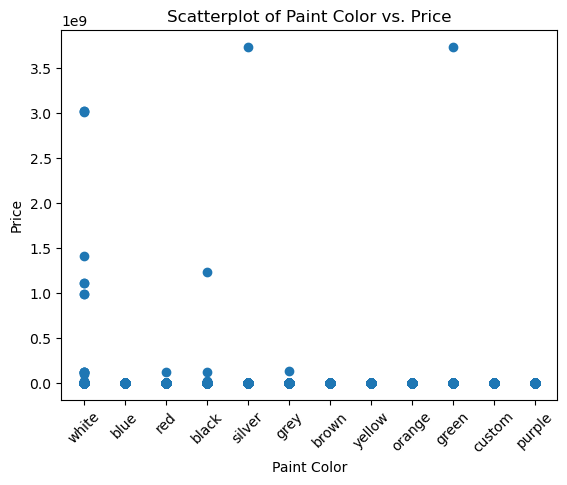

In [88]:
# However, it doesn't tell us of whether these three features increase or decrease the price of the car. 
# Thus, to do that, let's provide some scatterplots and heatmaps of these three features to the price of the car.

# Paint Color
plt.scatter(imputed_df['paint_color'], imputed_df['price'])
plt.xlabel('Paint Color')
plt.ylabel('Price')
plt.title('Scatterplot of Paint Color vs. Price')
plt.xticks(rotation=45)

The silver and green cars have the possibility to be expensive cars. The white cars also has a possibility of being expensive but not as expensive as silver and green. The black cars has a possibility of lower price than white but more expensive than the rest of the unspecified colored cars.

In [89]:
# Let's check the density using seaborn heatmap
import seaborn as sns

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'black'),
  Text(1.5, 0, 'blue'),
  Text(2.5, 0, 'brown'),
  Text(3.5, 0, 'custom'),
  Text(4.5, 0, 'green'),
  Text(5.5, 0, 'grey'),
  Text(6.5, 0, 'orange'),
  Text(7.5, 0, 'purple'),
  Text(8.5, 0, 'red'),
  Text(9.5, 0, 'silver'),
  Text(10.5, 0, 'white'),
  Text(11.5, 0, 'yellow')])

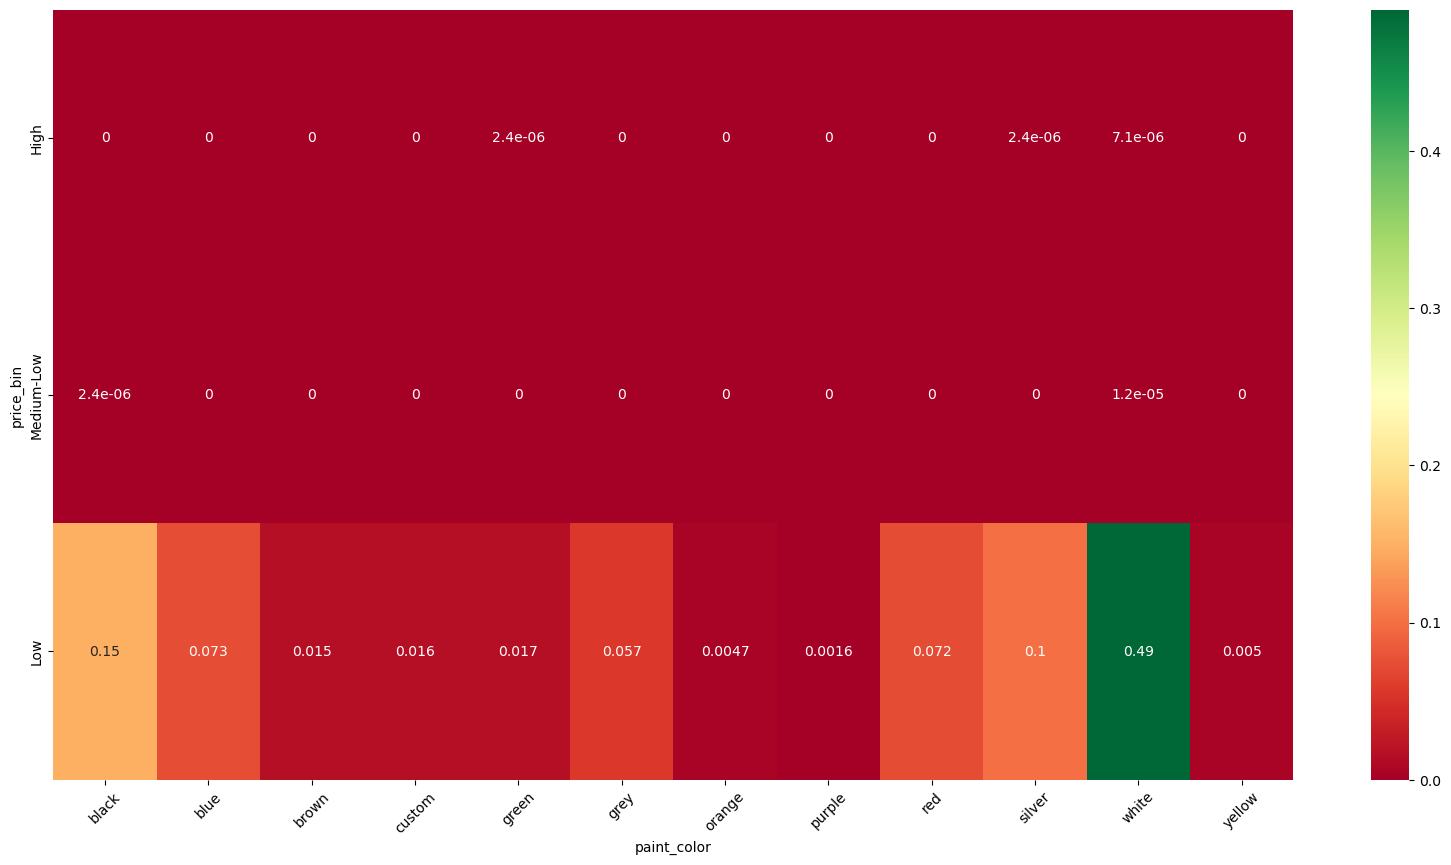

In [90]:
# Because there are many different prices, let's combine the various prices into 4 big price ranges
# for the sake of a readable heatmap.
price_bins = np.linspace(imputed_df['price'].min(), imputed_df['price'].max(), num=5)
imputed_df['price_bin'] = pd.cut(imputed_df['price'], bins=price_bins, 
                                 labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(imputed_df.price_bin,imputed_df.paint_color,normalize=True),annot=True,cmap='RdYlGn')\
   .invert_yaxis()
plt.xticks(rotation=45)

In [91]:
# The heatmap shows the possibility of having an expensive car based on color is highly low.

(array([1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(1880.0, 0, '1880'),
  Text(1900.0, 0, '1900'),
  Text(1920.0, 0, '1920'),
  Text(1940.0, 0, '1940'),
  Text(1960.0, 0, '1960'),
  Text(1980.0, 0, '1980'),
  Text(2000.0, 0, '2000'),
  Text(2020.0, 0, '2020'),
  Text(2040.0, 0, '2040')])

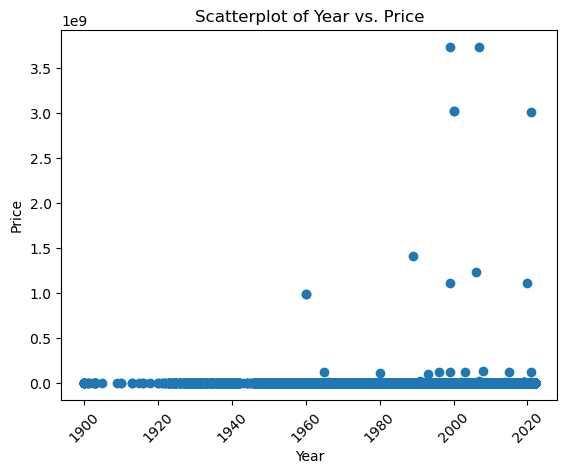

In [92]:
# Year
plt.scatter(imputed_df['year'], imputed_df['price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Scatterplot of Year vs. Price')
plt.xticks(rotation=45)

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'Earliest'),
  Text(1.5, 0, 'Mid-Early'),
  Text(2.5, 0, 'Mid-Recent'),
  Text(3.5, 0, 'Recent')])

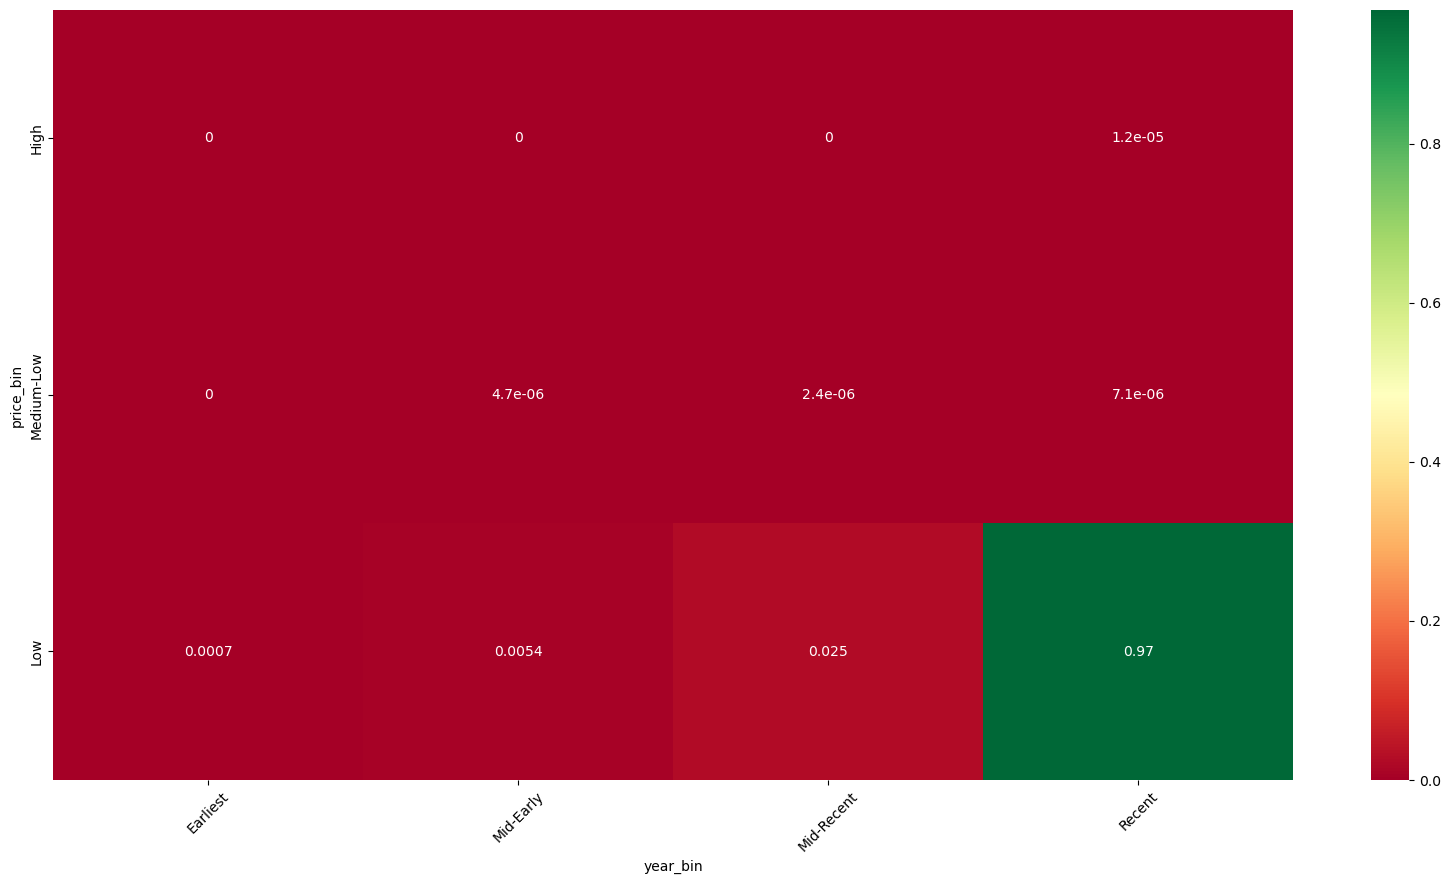

In [93]:
# The scatterplot shows a positive correlation between Year vs. Price.

# Since there are many different years, let's combine them into 4 big year ranges.
year_bins = np.linspace(imputed_df['year'].min(), imputed_df['year'].max(), num=5)
imputed_df['year_bin'] = pd.cut(imputed_df['year'], bins=year_bins, 
                                 labels=['Earliest', 'Mid-Early', 'Mid-Recent', 'Recent'])
plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(imputed_df.price_bin,imputed_df.year_bin,normalize=True),annot=True,cmap='RdYlGn')\
   .invert_yaxis()
plt.xticks(rotation=45)

Even though the majority of cars are on the Low Price Range, the Medium-Low Price Range becomes possible for cars not on the Earliest Year Range and High Price Range only becomes possible for Recent Year Range cars.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'good'),
  Text(1, 0, 'excellent'),
  Text(2, 0, 'fair'),
  Text(3, 0, 'like new'),
  Text(4, 0, 'new'),
  Text(5, 0, 'salvage')])

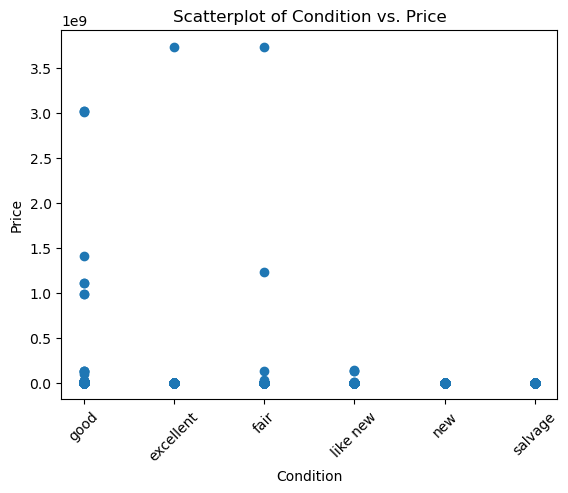

In [94]:
# Condition
plt.scatter(imputed_df['condition'], imputed_df['price'])
plt.xlabel('Condition')
plt.ylabel('Price')
plt.title('Scatterplot of Condition vs. Price')
plt.xticks(rotation=45)

Cars in fair, good, or excellent conditions can be possibly expensive. It's not surprising that all cars in salvage condition are cheap but it's rather surprising that cars in like-new or new conditions cannot possibly be that expensive.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'excellent'),
  Text(1.5, 0, 'fair'),
  Text(2.5, 0, 'good'),
  Text(3.5, 0, 'like new'),
  Text(4.5, 0, 'new'),
  Text(5.5, 0, 'salvage')])

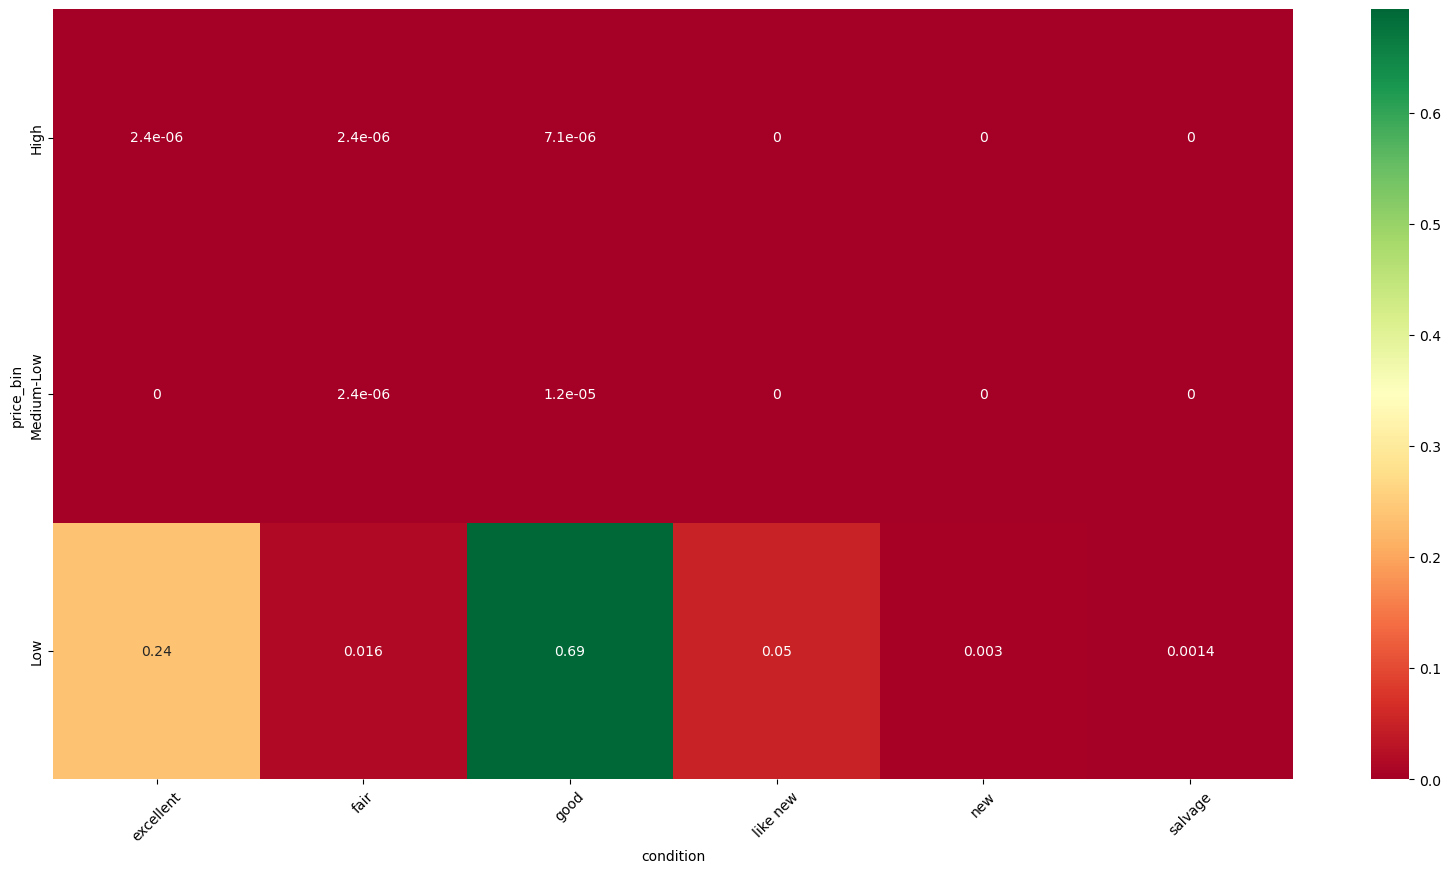

In [95]:
# Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(imputed_df.price_bin,imputed_df.condition,normalize=True),annot=True,cmap='RdYlGn')\
   .invert_yaxis()
plt.xticks(rotation=45)

Doesn't show new info except that cars in excellent or good conditions are significantly common in the given dataset.

#### Business Issues
Keep in mind that before the models were used, many categorical NaN values were replaced by frequent values of its respective column and the majority of prices that were initially 0 were changed into median prices. Thus, it can be said that the same-value presence in the modified car dataset is significant enough to make the dataset inaccurate, bias, and/or less credible.

There may be other ways to fix these very noticeable issues but unfortunately, I no longer have the time to find any. Thus, we are moving on to the Deployment with the Random Forest Regressor remaining as the best model.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

#### How will the model work when deployed

    To start off, this model can be deployed as a form of the car dealers' inventory that they can input car datasets  of their own with similar structures as my given one, i.e. each row represents an individual car and there can be  numerous features about the car in which one of the features has to be the price of the car in order for this model to work.

    It is highly recommended that the dataset has no missing values nor values that won't make any sense in a real-life scenario. Otherwise, if the model detect any missing/nonsensical values, then the model will automatically fill    them in with frequent values for categorical features or with a median value for numeric features using            SimpleImputer.

    The model will use CatBoost Encoder to encode the dataset and before using its best model Random Forest Regressor, it will ask the car dealer to choose a number from 2 to 12 telling the dealer that it represents a range from fast but probably inaccurate results to more slow but more accurate results. After the car dealer chose the number, that number will be input into the hyperparameter n_estimators of the Random Forest Regressor.

    Once these three features are found, it will then create a scatterplot and a heatmap for each feature for the car  dealer to see. It will interpret what the scatterplot and the heatmap meant for that specific feature relating to  price. Also, to avoid the heatmap from being overwhelmed with numerous different numeric values, the model will    automatically use np.linspace and pd.cut to create a new column with four categorical bins covering four equal     ranges of all different numeric values to have these four be the labels for the heatmap instead of the overwhelming different numeric values.

#### My findings interpreted to clients

    Before delivering my findings to the car dealers, I will first let them know that there were many                  missing/nonsensical values in my dataset which are replaced by the most frequent or median values of its respective feature so my findings may be bias to that regard.

    According to my model, the paint color of the car should be the first factor they should keep in mind when it comes to the price of the car. I will specifically tell them that there's a slim chance that consumers highly value      green, silver, and white cars with black cars being the secondary best. The rest of the colors seemed to be          completely lowly valued according to its price.

    Next up would be the year that the car was manufactured. It would seem that the more recent the car has been       manufactured, then the more chances the car will have to be highly valued or have a high price. Thus, if you want  used cars that are highly valued, look for less old-fashioned and more recent trendy ones.

    The last is the condition of the car. I cannot explain to them why cars that are in like-new or new conditions are not highly valued but I will sure tell them to also avoid ones in salvage condition, i.e. used cars that are no    longer roadworthy and cannot be repaired. Used cars that are either in fair, good, or excellent conditions however are what consumers highly valued. Thus, make sure to look after your used cars if you want your consumers to buy    them at a high price.